In [7]:
%%capture
#Install libraries
!pip install bs4==4.8.2;
!pip install pandas==1.0.1;
!pip install geopandas==0.8.1;
!pip install matplotlib==3.1.3;
!pip install folium==0.11.0;

In [8]:
#Import libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time 
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import os

In [9]:
name = []
company = []
location = []
subject = 'junior data analyst'
place = 'Canada'

In [10]:
web_pages = 'https://ca.indeed.com/jobs?q={}&l={}&start={}'.format(subject, place, 0)
req = requests.get(web_pages)
soup = BeautifulSoup(req.text, "html.parser")

In [11]:
actual_page = int(soup.find(id="searchCountPages").text.split(' ')[soup.find(id="searchCountPages").text.split(' ').index('Page')+1])
total_pages = int(soup.find(id="searchCountPages").text.split(' ')[soup.find(id="searchCountPages").text.split(' ').index('Page')+3].replace(',',''))

In [12]:
total_pages

49

In [13]:
for i in range(total_pages):
    print('Page {}'.format(i+1))
    if i%10 == 0:
        time.sleep(5)
    link_offers = 'https://ca.indeed.com/jobs?q={}&l={}&start={}'.format(subject, place, i*10)
    req = requests.get(link_offers)
    soup = BeautifulSoup(req.text, "html.parser")
    for job_offer in soup.find_all("div", "jobsearch-SerpJobCard unifiedRow row result"):
        name.append(job_offer.a['title'])
        company.append(job_offer.find('span','company').text.strip())
        try:
            location.append(job_offer.find('span','location accessible-contrast-color-location').text.strip())
        except:
            location.append(job_offer.find('span','remote').text.strip())

Page 1
Page 2
Page 3
Page 4
Page 5
Page 6
Page 7
Page 8
Page 9
Page 10
Page 11
Page 12
Page 13
Page 14
Page 15
Page 16
Page 17
Page 18
Page 19
Page 20
Page 21
Page 22
Page 23
Page 24
Page 25
Page 26
Page 27
Page 28
Page 29
Page 30
Page 31
Page 32
Page 33
Page 34
Page 35
Page 36
Page 37
Page 38
Page 39
Page 40
Page 41
Page 42
Page 43
Page 44
Page 45
Page 46
Page 47
Page 48
Page 49


In [14]:
#Cleaning data
df = pd.DataFrame(data=zip(name, company, location), columns=["Name", "Company", 'Location'])
df.Location.value_counts().to_dict()
df['Province'] = df.Location.apply(lambda x: x.split(', ')[1] if len(x.split(', ')) > 1 else 'No data')
count_provinces = df.Province.value_counts().to_dict()


In [15]:
#Add geo information about provinces
provinces = gpd.read_file(os.path.join(os.getcwd(), 'Data/lpr_000b16a_e/lpr_000b16a_e.shp'))    
provinces['prefix'] = ['NL','PEI','NS','NB','QC','ON','MB','SK','AB','BC','YK','NWT','NT']
provinces['Frecuency'] = provinces['prefix'].apply(lambda x: count_provinces[x] if x in count_provinces.keys() else 0)

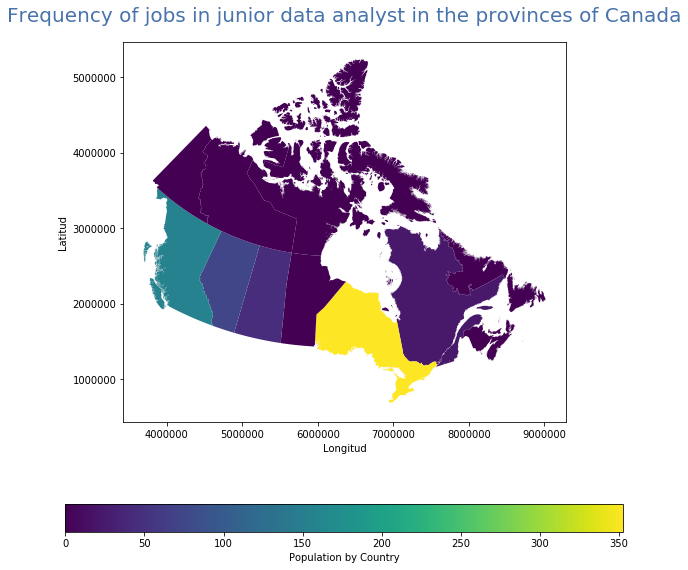

In [16]:
# Size display
fig, ax = plt.subplots(figsize=(10, 10))
 
# Titles and axis
ax.set_title('Frequency of jobs in {} in the provinces of Canada'.format(subject), 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Show map
provinces.plot(column='Frecuency', cmap='viridis', ax=ax, zorder=5, legend=True, 
               legend_kwds={'label': "Population by Country",
                            'orientation': "horizontal"})

In [17]:
"""m = folium.Map(location=[58, -102], zoom_start=3)

folium.Choropleth(
    geo_data=provinces,
    name='choropleth',
    data=provinces,
    columns=['prefix', 'Frecuency'],
    key_on='feature.properties.prefix',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='junior data analyst job offering'
).add_to(m)

folium.LayerControl().add_to(m)"""

"m = folium.Map(location=[58, -102], zoom_start=3)\n\nfolium.Choropleth(\n    geo_data=provinces,\n    name='choropleth',\n    data=provinces,\n    columns=['prefix', 'Frecuency'],\n    key_on='feature.properties.prefix',\n    fill_color='YlOrRd',\n    fill_opacity=0.7,\n    line_opacity=0.2,\n    legend_name='junior data analyst job offering'\n).add_to(m)\n\nfolium.LayerControl().add_to(m)"

In [18]:
"m"

'm'